# Perceptron

### Multi Layer Perceptron (Neural Network)

perceptron : 선형모델 -> Multi layer Perceptron : 비선형모델

In [6]:
from sklearn.neural_network import MLPClassifier

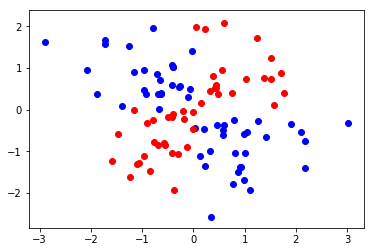

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r')
plt.show()

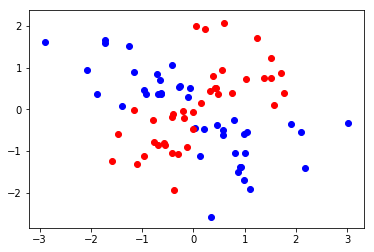

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
plt.scatter(X_train[y_train==-1, 0],
            X_train[y_train==-1, 1], c='r')
plt.show()

In [41]:
model_pctr = MLPClassifier(hidden_layer_sizes=(2),
                          max_iter=20000,
                          learning_rate_init=0.01)

In [42]:
model_pctr.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.01, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
model_pctr.score(X_test, y_test)

0.85

In [44]:
model_pctr.score(X_train, y_train)

0.8

In [69]:
model_pctr2 = MLPClassifier(hidden_layer_sizes=(10, 5),
                          max_iter=20000,
                          learning_rate_init=0.01
                           ).fit(X_train, y_train)

In [70]:
model_pctr2.score(X_test, y_test)

0.9

In [71]:
model_pctr2.score(X_train, y_train)

1.0

#### parameter 
- activation  
1) default : relu  
2) logistic  
3) tanh (sigmoid 일종)  
4) indentity : linear  
  
- solver   
1) default : adam  
2) lbfgs   
3) sgd : stochastic(확률적) gradient decent  
  
- alpha : l2 norm 규제 정도 (Ridge regression과 동일)
  
- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 이 될때까지)
  
- max_iter : optimizing 최대 반복 수

In [73]:
model_pctr2.coefs_

[array([[ 0.55506995,  0.99916568,  1.43663549,  1.02518899,  1.28394542,
         -1.10103559,  0.90847177, -2.07231787,  2.23075626, -1.5363614 ],
        [ 0.41545721, -0.29532929, -1.23936685, -1.58365901,  1.10455756,
         -1.64564475, -0.20490114,  0.33268444,  2.01818014,  1.72511101]]),
 array([[ 3.42668088e-01, -9.36307091e-01,  3.06353915e-01,
         -5.23451936e-01, -3.65154067e-01],
        [ 8.05118329e-01,  1.02957550e+00,  5.88588060e-01,
         -1.70343079e-01, -8.33611074e-02],
        [-9.82087550e-01,  1.65230294e+00,  7.56492279e-01,
          3.89448985e-02,  2.91729878e-01],
        [ 1.22408928e+00,  1.51670085e+00,  1.53949353e+00,
          2.18014580e-01, -7.96816255e-01],
        [ 1.61433184e+00, -6.13917654e-01, -9.77455921e-01,
         -6.61579092e-01,  1.08678445e-02],
        [ 2.07981282e+00, -1.74183210e+00, -1.23310743e-01,
         -6.93436815e-01, -8.27285456e-01],
        [ 3.21879237e-01,  7.16579373e-01,  6.08049904e-01,
          2.8580

In [102]:
len(model_pctr2.coefs_)

3

In [74]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr2.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 10)
hidden_layer_1_weight_no: (10, 5)
hidden_layer_2_weight_no: (5, 1)


In [75]:
model_pctr2.intercepts_

[array([-0.07023916,  0.52369775, -0.03541653,  0.49867073,  0.07079481,
         0.52160875,  0.35798812,  0.93022631, -0.38767488,  0.01016067]),
 array([ 0.4181211 , -0.30701692,  0.20364088, -0.48652919,  0.02258794]),
 array([0.09421476])]

In [76]:
#각 층의 bias 개수
for i, bias in enumerate(model_pctr2.intercepts_):
    print('hidden_layer_{}_weight_no: {}'.format(i, bias.shape))

hidden_layer_0_weight_no: (10,)
hidden_layer_1_weight_no: (5,)
hidden_layer_2_weight_no: (1,)


In [77]:
#학습하는 동안 optimization 반복 횟수
model_pctr2.n_iter_

295

In [79]:
#layer 개수
model_pctr2.n_layers_

4

In [80]:
#output node 수
model_pctr2.n_outputs_

1

In [81]:
#graph, dataset 확장 패키지
import mglearn

def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

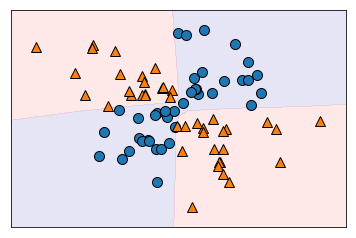

In [85]:
model_1 = MLPClassifier(hidden_layer_sizes=(10, 5),
                        max_iter=20000,
                        learning_rate_init=0.01).fit(X_train,
                                                          y_train)
result_visualization(model_1, X_train, y_train)

parameter를 바꿔가며 결과를 시각화해서 비교해보자.

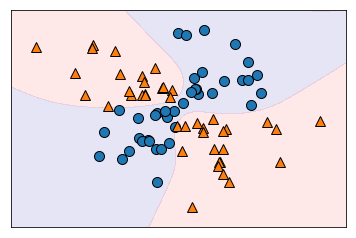

In [86]:
model_2 = MLPClassifier(hidden_layer_sizes=(10, 5),
                        max_iter=20000,
                        learning_rate_init=0.01,
                     activation='tanh').fit(X_train, y_train)
result_visualization(model_2, X_train, y_train)

relu 와 tanh의 비교
- tanh 의 decision boundary 가 더 부드럽다.

- relu의 decision boundary를 부드럽게 만들고 싶다면?   
층과 층의 노드 수를 늘리자. 

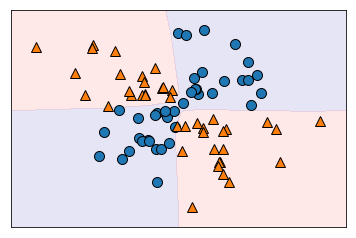

In [89]:
model_3 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                        max_iter=20000,
                        learning_rate_init=0.01).fit(X_train,
                                                          y_train)
result_visualization(model_3, X_train, y_train)

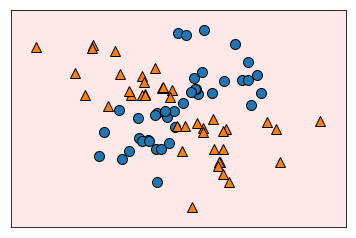

In [90]:
model_4 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                        max_iter=20000,
                        learning_rate_init=0.01,
                       activation='logistic').fit(X_train, y_train)
result_visualization(model_4, X_train, y_train)

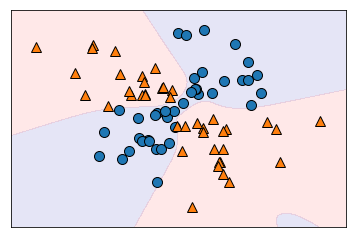

In [91]:
model_5 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                        max_iter=20000,
                        learning_rate_init=0.01,
                       activation='logistic',
                       solver='lbfgs').fit(X_train, y_train)
result_visualization(model_5, X_train, y_train)

activation을 logistic으로 할때는 
solver가 adam보다 lbfgs가 더 낫다.

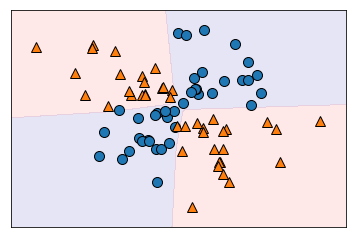

In [92]:
model_6 = MLPClassifier(hidden_layer_sizes=(10),
                        max_iter=20000,
                        learning_rate_init=0.01,
                       activation='relu',
                       alpha=1).fit(X_train, y_train)
result_visualization(model_6, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


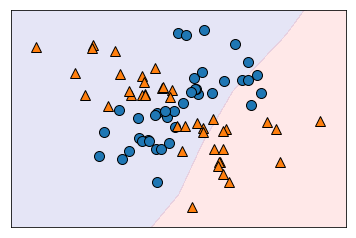

In [94]:
model_6 = MLPClassifier(hidden_layer_sizes=(10),
                       activation='relu',
                       alpha=10).fit(X_train, y_train)
result_visualization(model_6, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


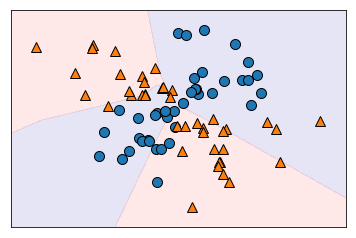

In [95]:
model_6 = MLPClassifier(hidden_layer_sizes=(10),
                       activation='relu',
                       alpha=100).fit(X_train, y_train)
result_visualization(model_6, X_train, y_train)

alpha를 크게 줄 수록 (규제를 강하게 할 수록)  
decision boundary는 각이 진다.